In [1]:
import pandas as pd
import numpy as np
#import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tq

In [2]:
df = pd.read_table('/Users/jaredlorince/Desktop/temp_data/5759068.txt',header=None,nrows=None,names=['song_id','artist_id','ts'],parse_dates=['ts'])

In [3]:
encountered = set()
new = []
blocks = []
last = None
block_idx = -1
for a in df.artist_id:
    if a not in encountered:
        new.append(1)
        encountered.add(a)
    else:
        new.append(0)
    if a != last:
        block_idx += 1
    blocks.append(block_idx)
    last = a
df['new'] = new
df['block'] = blocks
df['new_block'] = df['new'].cumsum()

In [356]:
naf.confidence_interval_,naf.cumulative_hazard_

,NA_estimate_upper_0.95,NA_estimate_lower_0.95
0.0,NaN,NaN
1.0,0.190417,0.149884
2.0,0.306152,0.251379
3.0,0.394079,0.329305
4.0,0.461434,0.389207
5.0,0.525677,0.446546
6.0,0.576634,0.492041
7.0,0.623106,0.533569
8.0,0.674610,0.579684
9.0,0.700956,0.603191


(0, 100)

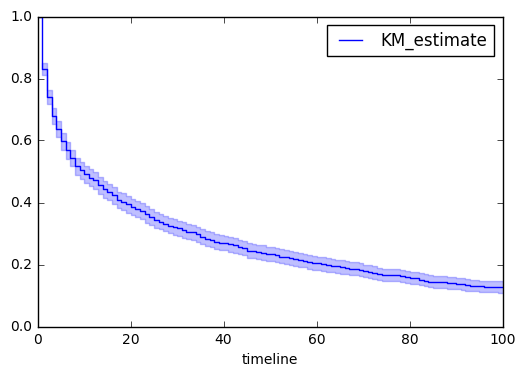

In [49]:
durations = df[df.new==0].groupby('new_block').song_id.count()
if df.new.iloc[-1]==0:
    observed = [1]*(len(durations)-1)+[0]
else:
    observed = [1]*len(durations)
#survival_data = pd.DataFrame({'duration':durations.values,'observed':observed})
kmf.fit(durations, event_observed=observed)
fig,ax = plt.subplots()
kmf.plot(ax=ax)
ax.set_xlim(0,100)

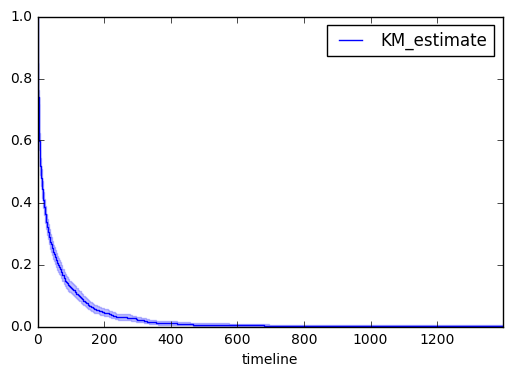

In [89]:
kmf.fit(durations,event_observed=observed).plot()

In [117]:
kmf.survival_function_.reindex(range(1,1001))['KM_estimate'].values

array([  8.31060606e-01,   7.40909091e-01,   6.79545455e-01,
         6.36363636e-01,   5.97727273e-01,   5.68939394e-01,
         5.43939394e-01,   5.17424242e-01,   5.04545455e-01,
         4.90909091e-01,   4.80303030e-01,   4.71969697e-01,
         4.56060606e-01,   4.42424242e-01,   4.34090909e-01,
         4.23484848e-01,   4.08333333e-01,   4.03030303e-01,
         3.93939394e-01,   3.84848485e-01,   3.79545455e-01,
         3.71969697e-01,   3.61363636e-01,   3.53787879e-01,
         3.43939394e-01,   3.38636364e-01,   3.31818182e-01,
         3.25757576e-01,   3.21212121e-01,   3.16666667e-01,
         3.11363636e-01,   3.06060606e-01,   3.03787879e-01,
         2.96969697e-01,   2.89393939e-01,   2.83333333e-01,
         2.79545455e-01,   2.72727273e-01,   2.70448215e-01,
         2.68928843e-01,   2.65130413e-01,   2.62091669e-01,
         2.56014181e-01,   2.52215751e-01,   2.44618891e-01,
         2.43099519e-01,   2.40820461e-01,   2.38541403e-01,
         2.33983287e-01,

          NA_estimate
timeline             
0.0          0.000000
1.0          0.184976
2.0          0.299745
3.0          0.386153
4.0          0.451769


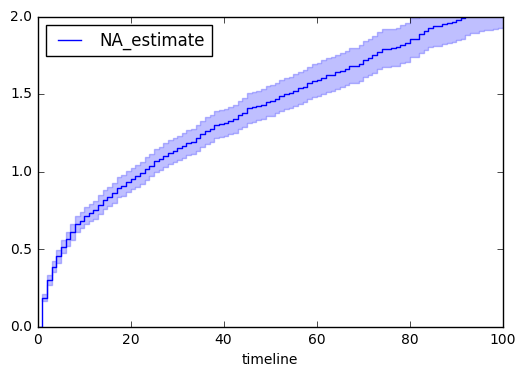

In [58]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(durations,event_observed=observed)
print(naf.cumulative_hazard_.head())
naf.plot(xlim=(0,100),ylim=(0,2))

In [111]:
naf.smoothed_hazard_(bandwidth=1).reindex(range(1,1001))['differenced-NA_estimate'].values

array([ 0.13873168,  0.08607701,  0.06480574,  0.04921212,  0.04694783,
        0.03699646,  0.03367912,  0.03745428,  0.01888988,  0.0205336 ,
        0.01636853,  0.01311639,  0.02569582,  0.02274816,  0.01424913,
        0.0185358 ,  0.02730055,  0.00979491,  0.01709475,  0.0174935 ,
        0.0103962 ,  0.01510625,  0.02167333,  0.0158736 ,  0.02115107,
        0.01164103,  0.01523754,  0.01380936,  0.01052648,  0.01067633,
        0.0126509 ,  0.01286796,  0.00558315,  0.01700324,  0.0193559 ,
        0.01585263,  0.01008079,  0.01849408,  0.00628495,  0.00421942,
        0.01065358,  0.00863318,  0.01757034,  0.01119423,  0.02290253,
        0.00466564,  0.00705334,  0.0071203 ,  0.01444666,  0.00243506,
        0.01229535,  0.01250028,  0.00760141,  0.00511075,  0.01293134,
        0.01050804,  0.00797879,  0.01621683,  0.01100936,  0.00556588,
        0.01125723,  0.01142878,  0.00288462,  0.01165071,  0.00885836,
        0.00896424,  0.01212146,         nan,  0.01232059,  0.01

In [121]:
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)
data = lifelines.datasets.load_dd()
import patsy
# the '-1' term
# refers to not adding an intercept column (a column of all 1s).
# It can be added to the Fitter class.
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')
X['T'] = data['duration']
X['E'] = data['observed']

In [22]:
result = np.zeros((1000,100),dtype=float)
for rep in tq(range(1000)):
    df_shuffle = df.sample(frac=1).reset_index(drop=True)
    encountered = set()
    new = []
    for a in df_shuffle.artist_id:
        if a not in encountered:
            new.append(1)
            encountered.add(a)
        else:
            new.append(0)
    df_shuffle['new'] = new
    df_shuffle['new_block'] = df_shuffle['new'].cumsum()
    #result[rep] = df_shuffle.groupby(df_shuffle.index/1000).new.mean().values
    result[rep] = df_shuffle[df_shuffle.new==0].groupby('new_block').artist_id.count().value_counts().reindex(range(1,101),fill_value=0).values
    break

In [122]:
aaf.fit(X, 'T', event_col='E')

 [-----------------100%-----------------] 1468 of 1468 complete in 1.1 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

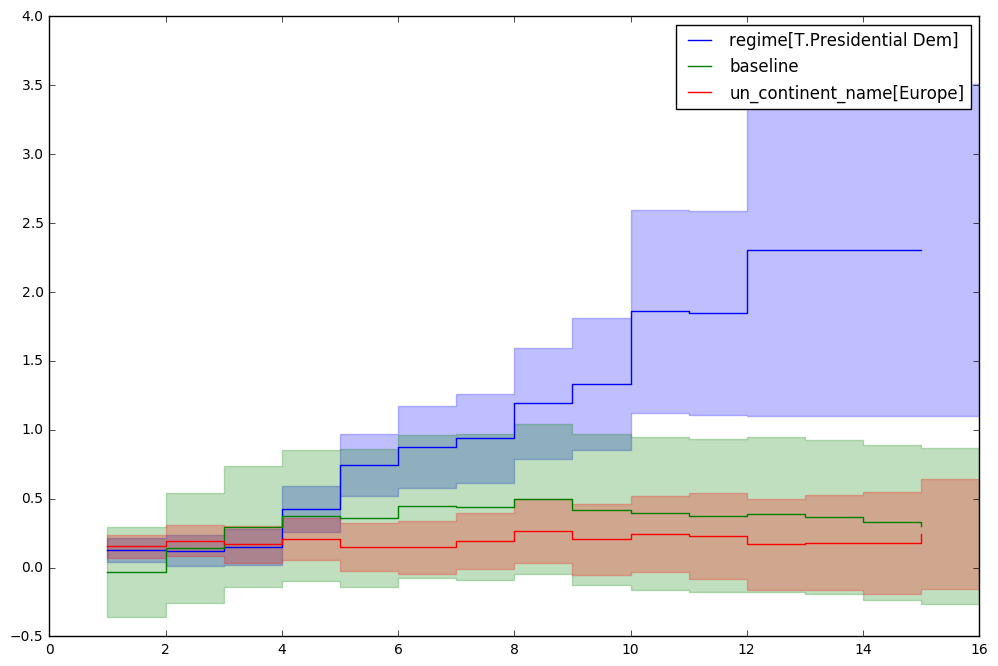

In [125]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
aaf.plot( columns=[ 'regime[T.Presidential Dem]', 'baseline', 'un_continent_name[Europe]' ], ix=slice(1,15), ax=ax)

In [23]:
exploit_streak = [np.nan]
streak = 0
for n in df_shuffle.new:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df_shuffle['exploit_streak'] = exploit_streak[:-1]
    

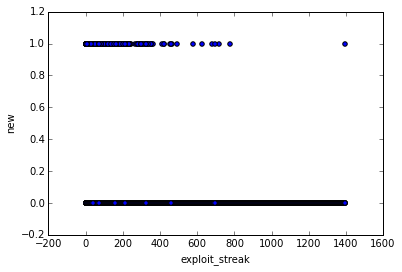

In [148]:
df.plot(kind='scatter',x='exploit_streak',y='new')

In [172]:
import statsmodels.api as sm
import statsmodels
test = statsmodels.tools.add_constant(df)
logit = sm.Logit(df['new'][1:], [testtest['const'][1:])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.138915
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58831
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                   0.000
Time:                        12:30:30   Log-Likelihood:                -8172.6
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.4354      0.024   -144.887      0.000        -3.482    -3.389


In [169]:
logit = sm.Logit(df_shuffle['new'][1:], df_shuffle['exploit_streak'][1:])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.264124
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58831
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 -0.9013
Time:                        12:29:39   Log-Likelihood:                -15539.
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                       nan
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
exploit_streak    -0.1099      0.001    -98.269      0.000        -0.112    -0.108


In [18]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ 1', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.138971
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58833
Model:                          Logit   Df Residuals:                    58832
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                   0.000
Time:                        13:06:34   Log-Likelihood:                -8176.1
converged:                       True   LL-Null:                       -8176.1
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.4348      0.024   -144.902      0.000        -3.481    -3.388
==============================================================================
"""

In [19]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ exploit_streak', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.128932
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58830
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 0.07186
Time:                        13:06:44   Log-Likelihood:                -7585.3
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                2.023e-257
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -2.6427      0.031    -84.541      0.000        -2.704    -2.581
exploit_streak    -0.0150      0.001    -23.498      0.000        -0.016    -0.014
==================================================================================
"""

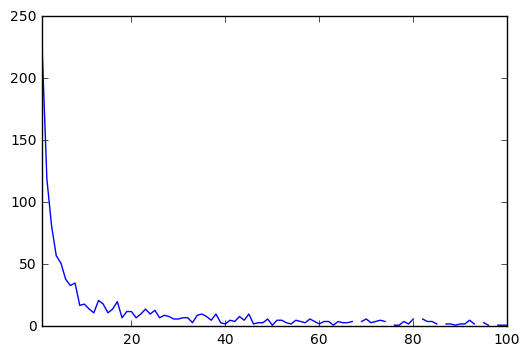

In [184]:
df[df.new==0].groupby('new_block').song_id.count().value_counts().reindex(range(1,101)).plot()

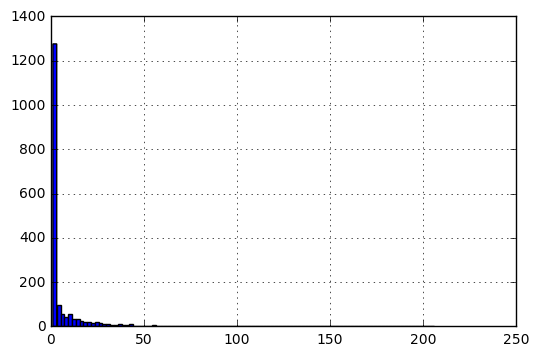

In [78]:
df.groupby('artist_id').apply(lambda x: len(x.song_id.unique())).hist(bins=100)

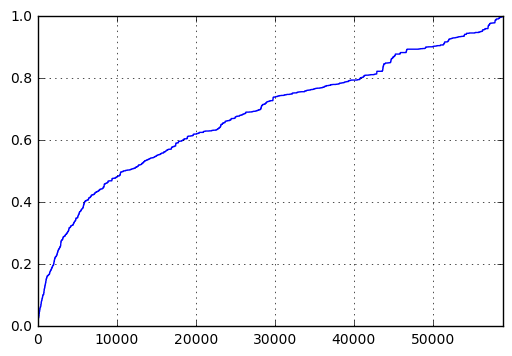

In [82]:
(df.new.cumsum() / float(len(df.artist_id.unique()))).plot(grid=True)

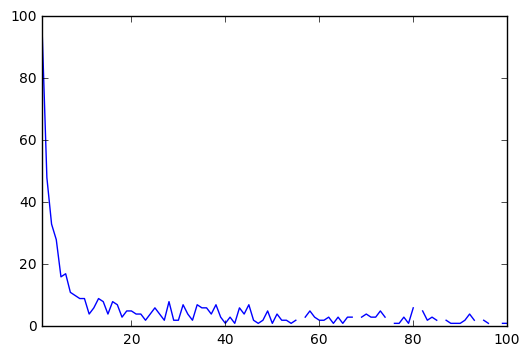

In [96]:
df[10788:][df[10788:].new==0].groupby('new_block').song_id.count().value_counts().sort_index().reindex(range(1,101)).plot()

In [95]:
((df.new.cumsum() / float(len(df.artist_id.unique())))<.5).sum()

10788

In [115]:
vcc = df[df.new==0].groupby('new_block').song_id.count().value_counts().sort_index().cumsum()

In [216]:
x = df[df.new==0].groupby('new_block').song_id.count().value_counts().sort_index()
x = x[::-1].cumsum()[::-1]

In [324]:
(x.diff(-1).fillna(1)/x)

1       0.168939
2       0.108478
3       0.082822
4       0.063545
5       0.060714
6       0.048162
7       0.043941
8       0.048747
9       0.024890
10      0.027027
11      0.021605
12      0.017350
13      0.033708
14      0.029900
15      0.018836
16      0.024433
17      0.035778
18      0.012987
19      0.022556
20      0.023077
21      0.013780
22      0.019960
23      0.028513
24      0.020964
25      0.027837
26      0.015419
27      0.020134
28      0.018265
29      0.013953
30      0.014151
          ...   
296     0.062500
297     0.066667
306     0.035714
310     0.037037
320     0.038462
324     0.040000
326     0.041667
327     0.043478
329     0.045455
333     0.047619
334     0.050000
348     0.052632
349     0.055556
354     0.058824
356     0.062500
360     0.066667
412     0.071429
419     0.076923
420     0.083333
456     0.090909
459     0.100000
466     0.111111
490     0.125000
576     0.142857
624     0.166667
679     0.200000
694     0.250000
716     0.3333

In [339]:
last = 0
result = []
for i in x[::-1]:
    result.append((i-last)/i)
    last = i

In [348]:
T = df[df.new==0].groupby('new_block').song_id.count()
C = [1]*len(T)
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(T, event_observed=C)
test = naf.cumulative_hazard_.diff().copy().dropna()
test['naive'] = (x.diff(-1).fillna(1)/x)
test['n'] = x

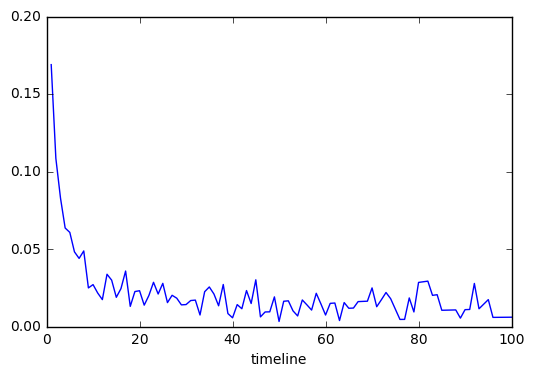

In [354]:
test.naive.plot(xlim=(0,100),ylim=(0,.2))

In [214]:
explore = []
last = None
for a in df.artist_id:
    if a == last:
        explore.append(0)
    else:
        explore.append(1)
    last = a
df['explore'] = explore
df['explore_block'] = df['explore'].cumsum()

exploit_streak = [np.nan]
streak = 0
for n in df.explore:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df['exploit_streak_switch'] = exploit_streak[:-1]
    

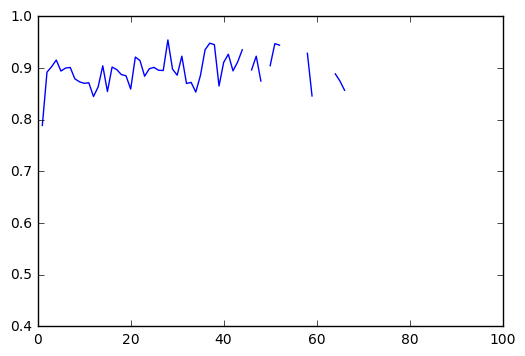

In [212]:
exploit_streaks = df[df.explore==0].groupby('explore_block').song_id.count().value_counts().sort_index()
cumulative = exploit_streaks[::-1].cumsum()[::-1]
max_idx = 1000
(cumulative.shift(-1)/cumulative.astype(float)).reindex(range(1,max_idx+1),fill_value=np.nan).plot(xlim=(0,100))

In [152]:
haz_cumulative = pd.read_csv('/Users/jaredlorince/Desktop/ind_hazard.csv',index_col='timeline')
haz_ci = pd.read_csv('/Users/jaredlorince/Desktop/ind_hazard_ci.csv',index_col=[0])
#.set_index('timeline').diff().plot()#.plot(xlim=(0,200))

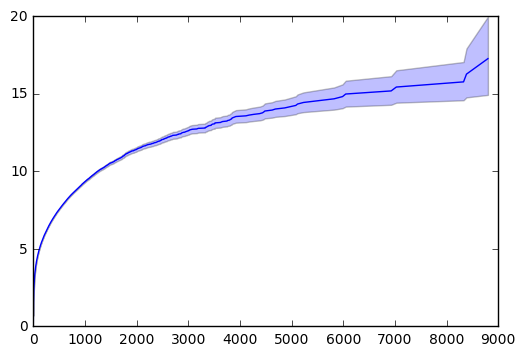

In [160]:
fig,ax = plt.subplots(1,1)
ax.plot(haz_cumulative.index,haz_cumulative)
ax.fill_between(haz_ci.index,haz_ci['NA_estimate_lower_0.95'],haz_ci['NA_estimate_upper_0.95'],alpha=.25)

In [304]:
p = np.arange(.01,.9,.01)[::-1]
def sim(nreps):
    result = []
    current = 0
    for _ in range(nreps):
        sample = np.random.random()
        if sample<p[current]:
            current +=1 
        else:
            if current>0:
                result.append(current)
            current = 0
        #print(sample,current)
    if current>0:
        result.append(current)
    return result

def emp_curve(nreps):
    x = pd.Series(sim(nreps)).value_counts().sort_index()
    x = x[::-1].cumsum()[::-1]
    #print(x)
    return ((x.diff(-1)/x))


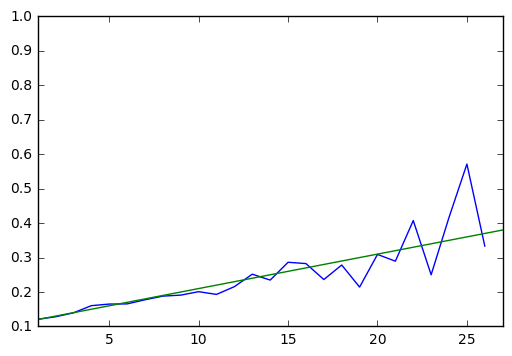

In [312]:
fig,ax = plt.subplots(1,1)
emp_curve(30000).plot(ax=ax)
ax.plot(p)

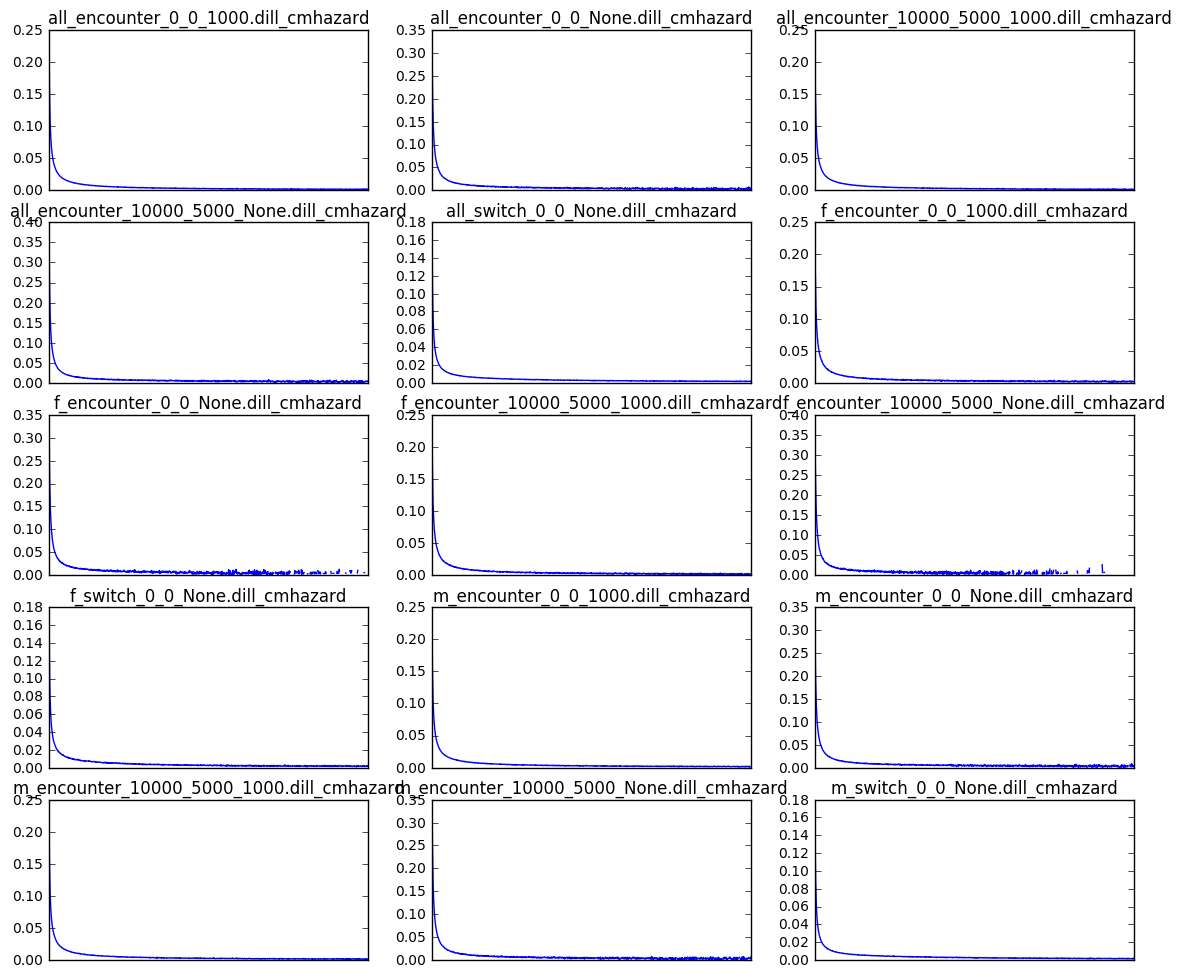

In [2]:
import glob
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
fig,axes = plt.subplots(5,3,figsize=(14,12))
af = axes.flat
for ax,f in zip(af,glob.glob('/Users/jaredlorince/Desktop/temp_data/cm/*')):
    t = f[f.rfind('/')+1:]
    current = pd.read_csv(f,index_col='timeline')
    current.reindex(range(1,1001)).diff().plot(ax=ax,legend=False)
    #current.diff().plot(ax=ax,legend=False)
    ax.set_title(t)
    ax.set_xticks([])
    ax.set_xlabel('')


In [3]:
glob.glob('/Users/jaredlorince/Desktop/temp_data/cm/*')

['/Users/jaredlorince/Desktop/temp_data/cm/all_encounter_0_0_1000.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/all_encounter_0_0_None.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/all_encounter_10000_5000_1000.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/all_encounter_10000_5000_None.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/all_switch_0_0_None.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/f_encounter_0_0_1000.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/f_encounter_0_0_None.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/f_encounter_10000_5000_1000.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/f_encounter_10000_5000_None.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/f_switch_0_0_None.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/m_encounter_0_0_1000.dill_cmhazard',
 '/Users/jaredlorince/Desktop/temp_data/cm/m_encounter_0_0_None.dill_cmhazard',
 '/Users

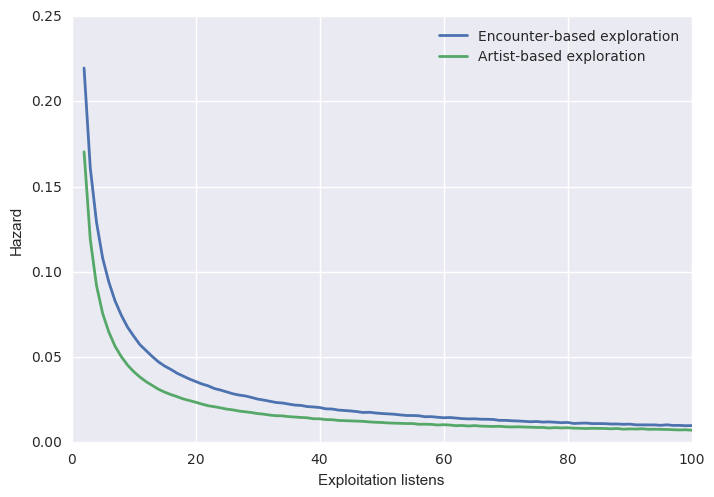

In [21]:
#import seaborn
fig,ax = plt.subplots()
for m,f in zip(('Encounter-based exploration','Artist-based exploration'),('/Users/jaredlorince/Desktop/temp_data/cm/all_encounter_10000_5000_1000.dill_cmhazard','/Users/jaredlorince/Desktop/temp_data/cm/all_switch_0_0_None.dill_cmhazard')):
    t = f[f.rfind('/')+1:]
    current = pd.read_csv(f,index_col='timeline')
    data = current.reindex(range(1,1001)).diff()#.plot(ax=ax,legend=True)
    ax.plot(data.NA_estimate,label=m,lw=2)
    #current.diff().plot(ax=ax,legend=False)
    #ax.set_title(t)
    #ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_xlim(0,100)
    ax.set_xlabel('Exploitation listens')
    ax.set_ylabel('Hazard')
ax.legend()    

In [24]:
pd.read_csv('/Users/jaredlorince/Desktop/temp_data/cm/all_switch_0_0_None.dill_cmhazard',index_col='timeline').diff()

,NA_estimate
timeline,
0.0,NaN
1.0,0.302757
2.0,0.170391
3.0,0.119123
4.0,0.092053
5.0,0.075557
6.0,0.064645
7.0,0.056341
8.0,0.050299
